# This is a notebook to explore satellite images

In [103]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import sys

sys.path.append("..") # Adds higher directory to python modules path.
from drought_detection.data_handling import parse_visual_rgb, get_img_from_example_rgb

import plotly.express as px
import matplotlib.pyplot as plt

In [104]:
# Don't know what that is
tf.compat.v1.enable_eager_execution()

In [105]:
# create a function called dirlist that extracts a list of file names (file) from a directory (di)
dirlist = lambda di: [os.path.join(di, file) for file in os.listdir(di) if 'part-' in file]

type(dirlist)

function

In [106]:
# use dirlist to get list of files
validation_files = dirlist('../raw_data/val/')
training_files = dirlist('../raw_data/train/')

# look at first file name of training data
training_files[0]

'../raw_data/train/part-r-00129'

In [107]:
# check number of files
len(training_files)

400

In [108]:
# parse the satellite image data
parsed_examples = parse_visual_rgb(training_files[0:5])

## checkout parsed data structure

In [109]:
# investigate first parsed image's B2 spectral band data
# parsed_examples[image][band]
parsed_examples[0]['B2']

<tf.Tensor: shape=(), dtype=string, numpy=b'\x1e\x1d\x1c\x1c\x1d\x1d\x1e\x1e\x1e\x1f\x1f\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1f\x1e\x1f "!"!   \x1f\x1f\x1e\x1e  \x1f\x1f\x1e\x1e\x1e\x1e\x1f !"!\x1f  \x1f\x1f\x1e\x1e\x1e\x1f   \x1f ! \x1e\x1d\x1d\x1d\x1d\x1d\x1d\x1d\x1e\x1f\x1e\x1e\x1d\x1e\x1e\x1e\x1e\x1f\x1e\x1e\x1e\x1e\x1e\x1e\x1f !!   \x1f\x1e\x1f\x1f\x1e\x1e\x1f\x1f\x1e\x1e\x1e\x1e\x1f\x1f!"! \x1f\x1f\x1e\x1e\x1e\x1e\x1d\x1f    \x1f   \x1e\x1d\x1d\x1c\x1d\x1d\x1d\x1d\x1e\x1e\x1e\x1e\x1d\x1d\x1d\x1e\x1f\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1f!! \x1f\x1f\x1e\x1e\x1f\x1f\x1e\x1e\x1f\x1e\x1e\x1e\x1e\x1f\x1f\x1f   \x1f\x1f\x1f\x1e\x1e\x1f\x1e\x1e\x1e\x1f \x1f\x1f\x1f\x1f\x1f \x1e\x1d\x1d\x1d\x1d\x1c\x1d\x1e\x1f\x1f\x1e\x1d\x1d\x1d\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e   \x1f\x1e  \x1f\x1e\x1e\x1f \x1e\x1d\x1e\x1e\x1f\x1f\x1e\x1f\x1f\x1f\x1f\x1f\x1e\x1e\x1e\x1e\x1e\x1f\x1e\x1f\x1f\x1f\x1f\x1f\x1e\x1f \x1e\x1d\x1d\x1d\x1d\x1c\x1d\x1e\x1e\x1e\x1d\x1d\x1d\x1e\x1e\x1e\x1e\x1e\x1e\x

In [110]:
type(parsed_examples)

list

In [111]:
type(parsed_examples[0])

dict

In [112]:
type(parsed_examples[0]['B2'])

tensorflow.python.framework.ops.EagerTensor

## transform and scale parsed image

In [113]:
image_matrix, label = get_img_from_example_rgb(parsed_examples[0]) # input must be in dictionary format

In [114]:
label

0

In [115]:
type(label)

numpy.int32

# explore transformed image data structure

### each band was transformed into a 65x65 matrix of values

In [116]:
image_matrix.shape # each band was transformed into a 65x65 matrix of values (and we have 3 bands here)

(65, 65, 3)

In [167]:
# # OUTPUT FROM CODE BELOW (wrapping our heads around the matrix representation):

#   I don't think this is the whole story, but it may be a start.

#   columns = channels
#   n number of matrices = pixels in n rows of image
#   n rows inside each matrix = pixels in n columns of image

#   - First column is RED channel: in this column, the first three numbers (200,175,154) 
#   are the pixels in the FIRST ROW in the FIRST THREE COLUMNS of the image, 
#   the second three numbers in the column (192, 163, 167) are the pixels 
#   in the SECOND ROW in the FIRST THREE COLUMNS of the image, 
#   the third three numbers in the column (188,158,163) are the pixels in
#   the THIRD ROW in the FIRST THREE COLUMNS, etc.

#   - Second column is the GREEN channel: in this middle column, 
#   the first three numbers (206,188,176) are the pixels in the FIRST ROW in 
#   the FIRST THREE COLUMNS of the image, the second three numbers in the column 
#   (194,182,188) are the pixels in the SECOND ROW in the FIRST THREE COLUMNS of 
#   the image, the third three numbers in the column (194,176,182) are the pixels
#   in the THIRD ROW in the FIRST THREE COLUMNS, etc.

#   - Third column is the BLUE channel: the same goes for the third 
#   column of blue channel values for each pixel in the image...
  
  
#   OR, you could think of the first three numbers in the first row (200, 206, 201) 
#   as the first pixel in the FIRST row and FIRST column with all three of its channels,
#   and the next row of three numbers (175, 188, 194) as the pixel in 
#   the FIRST row in the SECOND column (with all of its channels)


image_matrix[0:5,0:3,:] # pixels from first 5 rows, first 3 columns, all three channels (red, green, blue)

array([[[200, 206, 201],
        [175, 188, 194],
        [154, 176, 187]],

       [[192, 194, 201],
        [163, 182, 194],
        [167, 188, 194]],

       [[188, 194, 201],
        [158, 176, 194],
        [163, 182, 194]],

       [[192, 194, 201],
        [154, 182, 194],
        [171, 188, 194]],

       [[192, 200, 201],
        [171, 188, 194],
        [188, 194, 194]]], dtype=uint8)

In [148]:
image_matrix[0][0] # red, green, and blue for the first pixel?

array([200, 206, 201], dtype=uint8)

In [149]:
image_matrix[5][0] # red, green, and blue for the pixel in the fifth row in the first column??

array([192, 200, 201], dtype=uint8)

In [150]:
image_matrix[5,0] # these values seem to be the same as above, but with different way of indexing....?confused

array([192, 200, 201], dtype=uint8)

In [151]:
image_matrix[5,0,0]

192

In [152]:
image_matrix[:,:,0].shape # all pixels for the red band?

(65, 65)

In [161]:
image_matrix[0:5,0:3,:] # all bands for the pixels in the first 5 rows and first 4 columns?

array([[[200, 206, 201],
        [175, 188, 194],
        [154, 176, 187]],

       [[192, 194, 201],
        [163, 182, 194],
        [167, 188, 194]],

       [[188, 194, 201],
        [158, 176, 194],
        [163, 182, 194]],

       [[192, 194, 201],
        [154, 182, 194],
        [171, 188, 194]],

       [[192, 200, 201],
        [171, 188, 194],
        [188, 194, 194]]], dtype=uint8)

In [157]:
image_matrix[0:5,0:3,0] # red band?

array([[200, 175, 154],
       [192, 163, 167],
       [188, 158, 163],
       [192, 154, 171],
       [192, 171, 188]], dtype=uint8)

In [158]:
image_matrix[0:5,0:3,1] # green band?

array([[206, 188, 176],
       [194, 182, 188],
       [194, 176, 182],
       [194, 182, 188],
       [200, 188, 194]], dtype=uint8)

In [159]:
image_matrix[0:5,0:3,2] # blue band?

array([[201, 194, 187],
       [201, 194, 194],
       [201, 194, 194],
       [201, 194, 194],
       [201, 194, 194]], dtype=uint8)

# Plot transformed data

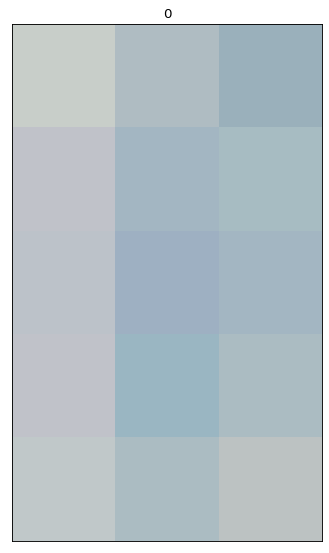

In [196]:
# single image, pixels from first 5 row, and first 3 columns, all channels (in this case, red, green, blue)
fig=plt.figure(figsize=(5, 10), dpi= 80, facecolor='w', edgecolor='k')


plt.imshow(image_matrix[0:5,0:3,:]).axes.get_xaxis().set_visible(False) # pixels from first 5 rows, first 3 columns, and all three channels (red, green, blue)
plt.imshow(image_matrix[0:5,0:3,:]).axes.get_yaxis().set_visible(False)
plt.title(str(label));

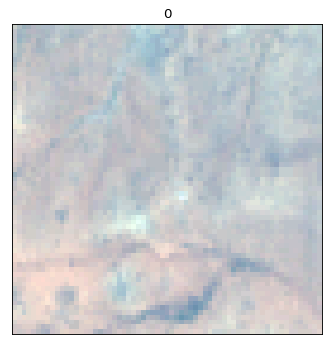

In [197]:
# single image, all pixels, all channels (red, green, blue in this case)
fig=plt.figure(figsize=(5, 10), dpi= 80, facecolor='w', edgecolor='k')


plt.imshow(image_matrix).axes.get_xaxis().set_visible(False) # all pixels, all channels
plt.imshow(image_matrix).axes.get_yaxis().set_visible(False) # all pixels, all channels
plt.title(str(label));

Text(0.5, 1.0, '0')

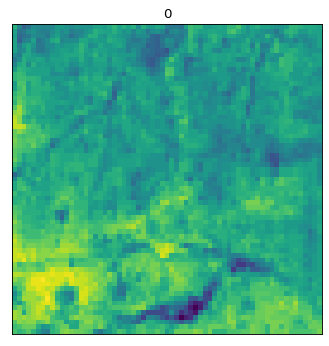

In [198]:
# single image, red channel
fig=plt.figure(figsize=(5, 10), dpi= 80, facecolor='w', edgecolor='k')


plt.imshow(image_matrix[:,:,0]).axes.get_xaxis().set_visible(False) # red channel, all pixels
plt.imshow(image_matrix[:,:,0]).axes.get_yaxis().set_visible(False) # red channel, all pixels
plt.title(str(label))

Text(0.5, 1.0, '0')

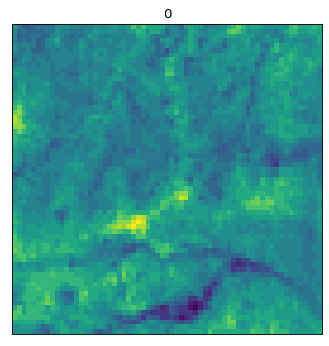

In [199]:
# single image, green channel
fig=plt.figure(figsize=(5, 10), dpi= 80, facecolor='w', edgecolor='k')


plt.imshow(image_matrix[:,:,1]).axes.get_xaxis().set_visible(False) # green channel, all pixels
plt.imshow(image_matrix[:,:,1]).axes.get_yaxis().set_visible(False) # green channel, all pixels
plt.title(str(label))

Text(0.5, 1.0, '0')

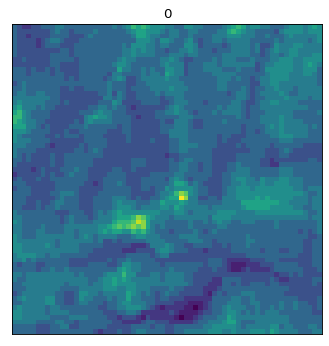

In [200]:
# single image blue channel
fig=plt.figure(figsize=(5, 10), dpi= 80, facecolor='w', edgecolor='k')


plt.imshow(image_matrix[:,:,2]).axes.get_xaxis().set_visible(False) # blue channel, all pixels
plt.imshow(image_matrix[:,:,2]).axes.get_yaxis().set_visible(False) # blue channel, all pixels
plt.title(str(label))

In [224]:
# checking satellite image #8
img, label = img, label = get_img_from_example_rgb(parsed_examples[8])

In [225]:
img.shape

(65, 65, 3)

Text(0.5, 1.0, '0')

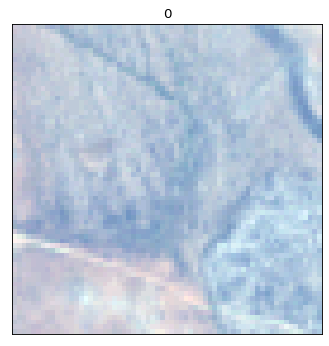

In [226]:
# single image, green channel
fig=plt.figure(figsize=(5, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(img[:,:,:]).axes.get_xaxis().set_visible(False) # green channel, all pixels
plt.imshow(img[:,:,:]).axes.get_yaxis().set_visible(False) # green channel, all pixels
plt.title(str(label))

/var/folders/q5/2d8pwqf14mv_nz14d23_2b040000gn/T/ipykernel_28078/2662640883.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


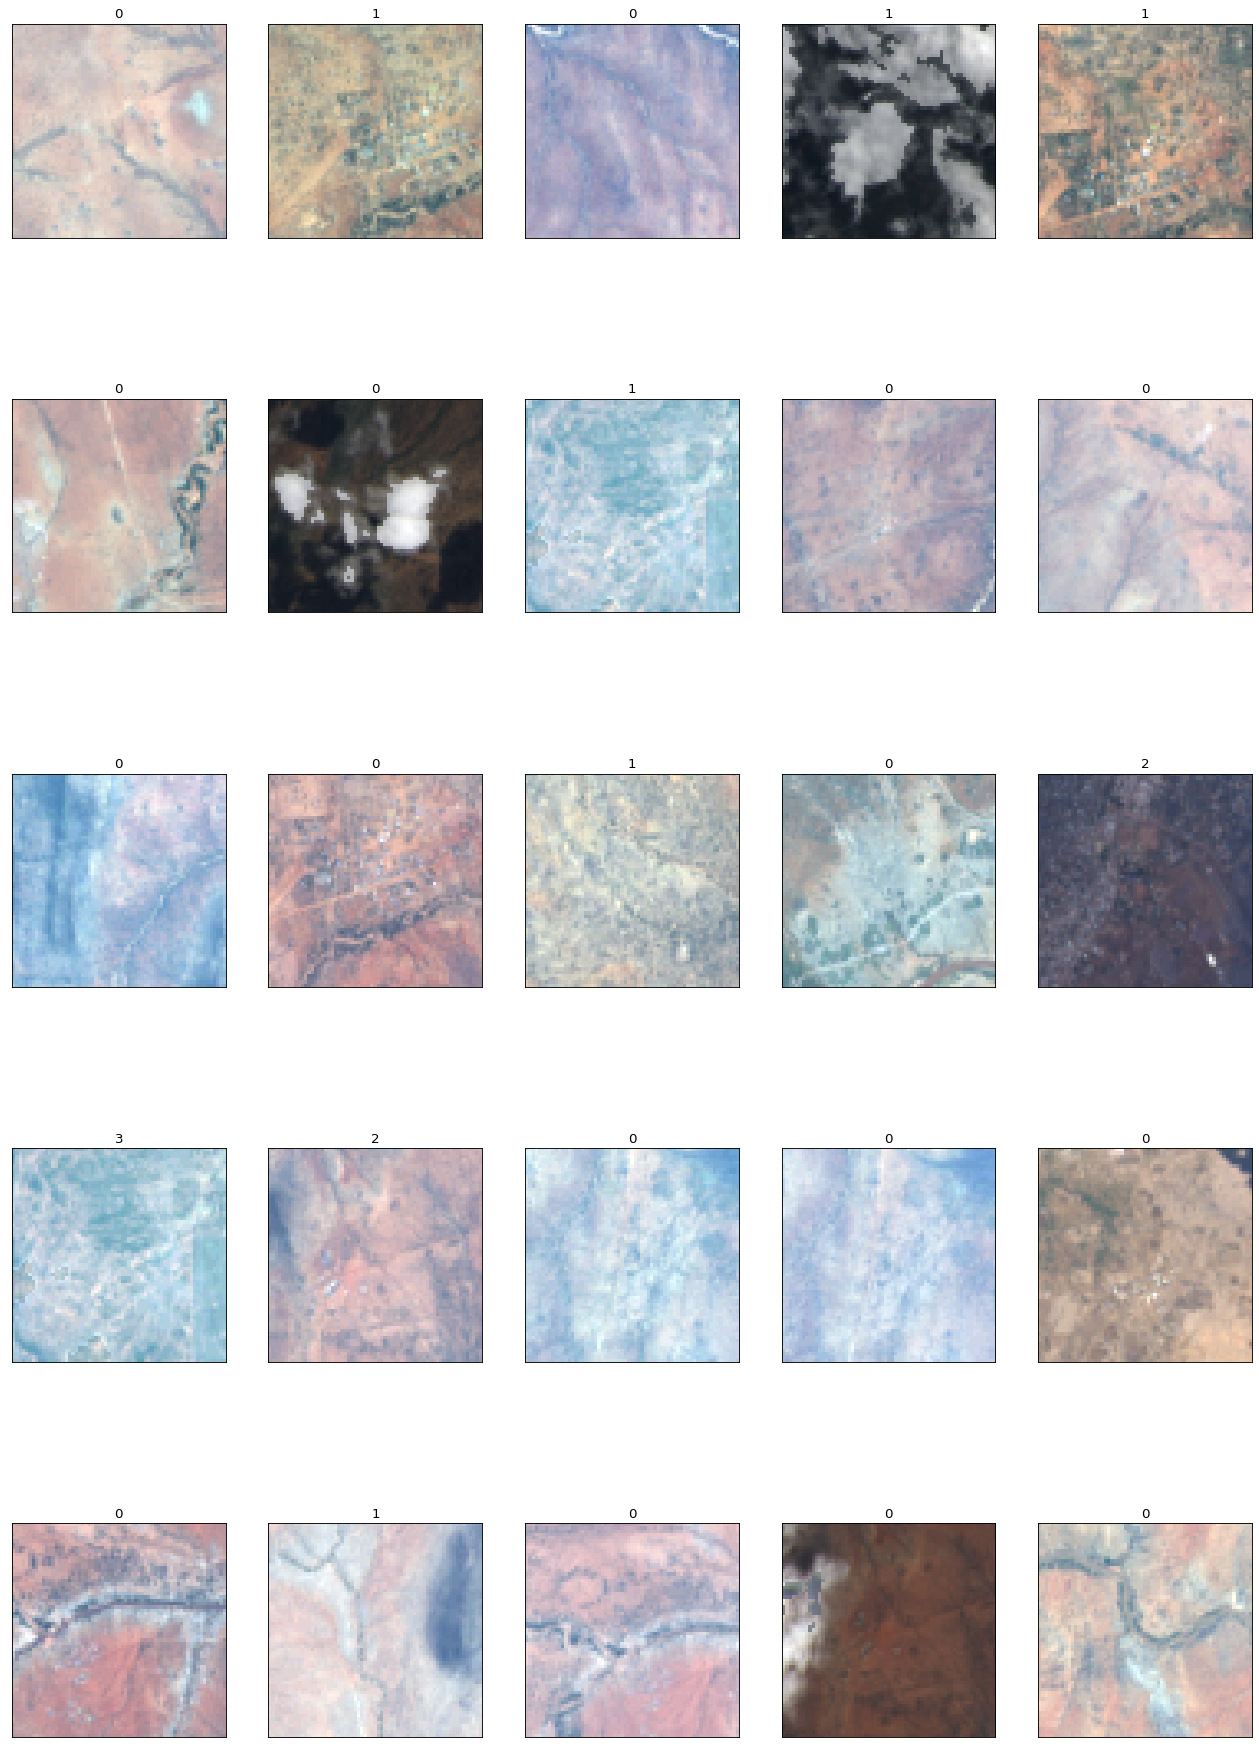

In [44]:
# plot a batch of images
'''
This snippet should be transformed into a function with keyword arguments (**kwargs).

This snippet plots satellite images
Utils:    - get_img_from_example(...)
'''

for i in range(1,26):
    plt.subplot(5, 5, i)
    img, label = img, label = get_img_from_example(parsed_examples[i+7]) # why + 7?
    plt.imshow(img).axes.get_xaxis().set_visible(False)
    plt.imshow(img).axes.get_yaxis().set_visible(False)
    plt.title(str(label))

fig.show()